### DBSCAN 

- stands for “density based spatial clustering of applications with noise”

- **DBSCAN is a density based algorithm**

- **Density means no. of points with in a specified radius r(eps)**

- A point is a **core point** if it has atleast specified no. of points with in radius eps

- A point which has fewer than specified points with in radius eps is called **border point**
 but it is the neighborhood of a core point

- A point which is not a core point or border point is called **noise point**

- does not require the user to set the number of clusters a priori

- can identify points that are not part of any cluster (very useful as outliers detector)

- There are two parameters in DBSCAN: **min_samples and eps**

<img src='images/db1.PNG' width='80%' height='80%'/>

<img src='images/dbscan.png' width='50%' height='50%' />

A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 

### Let's take an example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


### Generate dataset

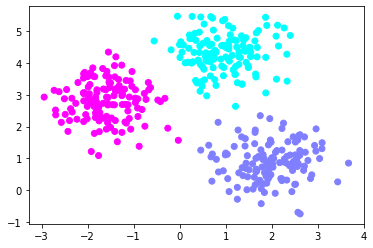

In [3]:
X,Y = make_blobs(n_samples=400, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='cool')

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [5]:
dbscan = DBSCAN(eps=0.3, metric='euclidean', min_samples=10)
clusters = dbscan.fit_predict(x_scaled)

In [12]:
# dbscan.labels_

### Plot clusters

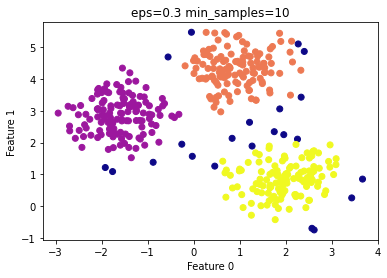

In [11]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='plasma')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("eps={} min_samples={}".format(dbscan.eps, dbscan.min_samples))
plt.show()

- In above graph blue points are noise points (outliers)

In [13]:
print("Adjust Rand Index: ", metrics.adjusted_rand_score(Y, dbscan.labels_))

Adjust Rand Index:  0.9155383781069139


### Importance of parameter 'eps'

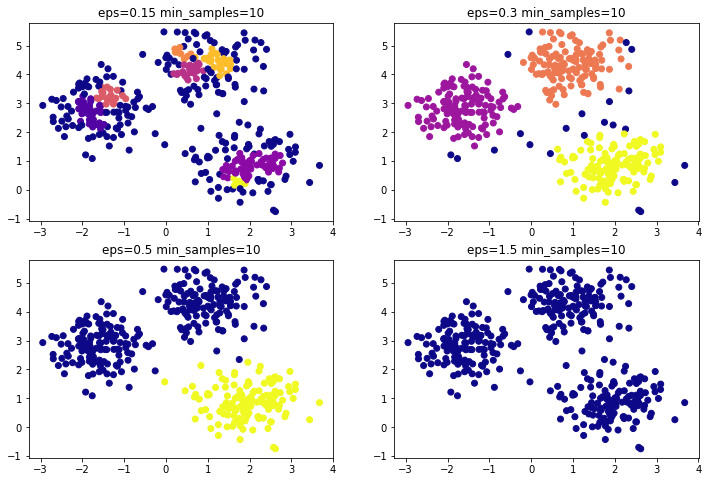

In [27]:
values = [0.15,.3,.5,1.5]
plt.figure(figsize=(12,8))
for i, k in enumerate(values,start=1):
    plt.subplot(2,2,i)
    db = DBSCAN(eps=k, min_samples=10)
    db.fit(x_scaled)
    plt.scatter(X[:,0], X[:,1],c=db.labels_, cmap='plasma')
    plt.title('eps={} min_samples={}'.format(db.eps, db.min_samples))

<b>The parameter eps</b> controls the local neighborhood of the points.

<b>When chosen too small,</b> most data will not be clustered at all (and labeled as -1 for noise)

<b>When chosen too large,</b> it causes close clusters to be merged into one cluster, abd eventually the entire dataset to be  returned as single cluster.

### The importance of min_samples

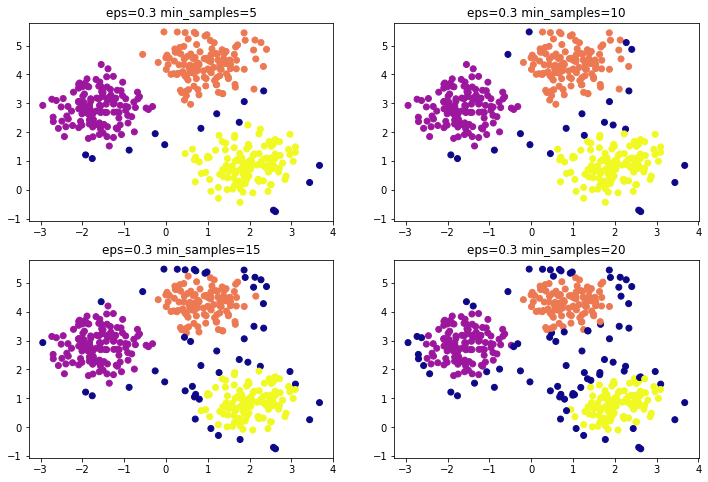

In [28]:
neighbours = [5,10,15,20]
plt.figure(figsize=(12,8))
for i, n in enumerate(neighbours,start=1):
    plt.subplot(2,2,i)
    db = DBSCAN(eps=0.3, min_samples=n)
    db.fit(x_scaled)
    plt.scatter(X[:,0], X[:,1],c=db.labels_, cmap='plasma')
    plt.title('eps={} min_samples={}'.format(db.eps, db.min_samples))